<a href="https://colab.research.google.com/github/snghynn/summ/blob/main/%ED%8C%8C%EB%A8%B8%EC%99%84_ch8_%ED%85%8D%EC%8A%A4%ED%8A%B8_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

pg. 466 ~ 486

# Ch6. 텍스트 분석

- 텍스트 분류(Text Classification)
  - 문서가 특정 분류 또는 카테고리에 속하는 것을 예측하는 기법
  - 예)
    - 특정 신문 기사 내용이 연애/정치/사회/문화 중 어떤 카테고리에 속하는지 자동으로 분류
    - 스팸 메일 검출
  - 지도학습 적용

- 감성 분석(Sentiment Analysis)
  - 텍스트에서 나타나는 감정/판단/믿음/의견/기분 등의 주관적인 요소를 분석하는 기법
  - 예)
    - 소셜 미디어 감정 분석
    - 영화나 제품에 대한 긍정 또는 리뷰
    - 여론조사 의견 분석
  - 지도학습 + 비지도학습

- 텍스트 요약(Summarization)
  - 텍스트 내에서 중요한 주제나 중심 사상을 추출
  - 예) 토픽 모델링

- 텍스트 군집화(Clustering)와 유사도 측정
  - 비슷한 유형의 문서에 대해 군집화 수행
  - 비지도학습
  - 유사도 측정


## 6.1 텍스트 분석 이해

- 텍스트 분석: 텍스트(비정형 데이터) 분석
- 머신러닝 알고리즘은 숫자형의 피처 기반 데이터만 입력받을 수 있음: 비정형 텍스트 데이터 -> 피처 형태?
- 피처 백터화(Feature Vectorization) 또는 피처 추출(Feature Extraction)
  - 텍스트를 word 기반의 다수 피처 추출 후 단어 빈도수와 같은 숫자 값 부여
  - 텍스트는 단어의 조합인 벡터값으로 표현 가능

- BOW(Bag of Words)
- Word2Vec


### 텍스트 분석 수행 프로세스

1. 텍스트 사전 준비작업(텍스트 전처리) : 텍스트 정규화 작업
  - 텍스트를 피처로 만들기 전에 미리 클렌징
  - 대/소문자 변경, 특수문자 삭제 등의 클렌징 작업
  - 단어 등의 토큰화 작업
  - 의미 없는 단어 제거 작업
  - 어근 추출

2. 피처 벡터화/추출
  - 사전 준비 작업으로 가공된 텍스트에서 피처를 추출하고 여기에 벡터값 활당
  - BPW, Word2Vec

3. ML 모델 수립 및 학습/예측/평가
  - 피처 벡터화된 데이터 세트에 ML 모델을 적용해 학습/예측 및 평가
  


  ### 파이썬 기반의 NLP, 텍스트 분석 패키지
  - NLTK
  - Gensim
  - SpaCy

## 6.2 텍스트 사전 준비 작업(텍스트 전처리) = 텍스트 정규화

- 텍스트 작업을 위해 사전에 텍스트를 가공하는 준비 작업 필요
- 텍스트 정규화: 텍스트를 ML 알고리즘이나 NLP 애플리케이션에 입력 데이터로 사용하기 위해 사전 작업 수행 하는 것을 의미
- 텍스트 정규화 작업의 분류
  - 클렌징 : 텍스트 분석에 방해가 되는 불필요한 문자, 기호 등을 사전에 제거
  - 토큰화
    - 문장 토큰화: 문서에서 문장을 분리
    - 단어 토큰화: 단어를 토큰으로 분리
  - 필터링/스톱 워드 제거/철자 수정:
  - Stemming
  - Lemmatization

### 1) 문장 토큰화
- 문장의 마침표(.), 개행문자(\n) 등 문장의 마지막을 뜻하는 기호에 따라 분리하는 것이 일반적
- 정규 표현식에 따른 문장 토큰화
- sent_tokenize

- 3개의 문장으로 이루어진 텍스트 문서를 문장으로 각각 분리하는 예제

In [1]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
text_sample = 'The Matrix is everywhere its all around us, here even in this room.\
                You can see it out your window or on your television.\
                You feel it when you go to work, or go to church or pay your taxes.'

sentences = sent_tokenize(text = text_sample)

print(type(sentences), len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


>- sent_tokenize()가 반환하는 것은 각각의 문장으로 구성된 list 객체
- 반환된 list 객체가 3개의 문장으로 된 문자열을 가지고 있는 것을 알 수 있음

### 2) 단어 토큰화
- 문장을 단어로 토큰화하는 것
- 공백, 콤마(,), 마침표(.), 개행문자 등으로 단어를 분리
- 정규 표현식을 이용해 다양한 유형으로 토큰화 수행 가능

- Bag of Word와 같이 단어의 순서가 중요하지 않은 경우 문장 토큰화를 사용하지 않고 단어 토큰화만 사용해도 충분
- 문장 토큰화: 각 문장이 가지는 시맨틱적인 의미가 중요한 요소로 사용될 때 사용
- word_tokenize()

In [3]:
from nltk import word_tokenize
sentence = 'The Matrix is everywhere its all around us, here even in this room.'
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


- sent_tokenize와 word_tokenize를 조합해 문서에 대해서 모든 단어를 토큰화
- text_sample을 문장별로 단어 토큰화 적용

In [4]:
from nltk import word_tokenize, sent_tokenize

# 여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수 생성
def tokenize_text(text):

    # 문장별로 분리 토큰
    sentences = sent_tokenize(text)
    # 분리된 문장별 단어 토큰화
    word_tokens = [word_tokenize(sentence)for sentence in sentences]
    return word_tokens

# 여러 문장에 대해 문장별 단어 토큰화 수행
word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


> - 문장을 단어별로 하나씩 토큰화할 경우 문맥적인 의미는 무시됨
- 이런 문제 해결 -> n-gram: 연속된 n개의 단어를 하나의 토큰화 단위로 분리해 내는 것

### 3) 스톱 워드 제거
- 스톱 워드 : 분석에 큰 의미가 없는 단어
- 필수 문법 요소 등이 문법적인 특성으로 인해 빈번하게 텍스트에 나타남 -> 사전에 제고 필요
- NLTK에서 언어의 스톱 워드 제공

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
# 스톱워드 목록
print('영어 stop words 개수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [7]:
# stopwords를 필터링으로 제거해 분석을 위한 의미 있는 단어만 추출
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []

# 위 예제에서 3개의 문장별로 얻은 word_tokens list에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
  filtered_words = []
  # 개별 문장별로 토큰화된 문장 list에 대해 스톱 워드를 제거하는 반복문
  for word in sentence:
    #소문자로 모두 변환
    word = word.lower()
    # 토큰화된 개별 단어가 스톱 워드의 단어에 포함되지 않으면 word_tokens에 추가
    if word not in stopwords:
      filtered_words.append(word)
  all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


> - is, this와 같은 스톱 워드가 필터링을 통해 제거됨

### 4) Stemming과 Lemmatization

- 문법적 또는 의미적으로 변화하는 단어의 원형 찾기
- Lemmatization이 Stemming보다 정교. 의미론적인 기반에서 단어의 원형을 찾음

- Stemming: 원래 단어에서 일부 철자가 훼손된 어근 단어를 추출
- Lemmatization: 품사와 같은 문법적인 요서와 더 의미적인 부분을 감안해 정확한 철자로 된 어근 단어를 찾아줌(: 더 오랜 시간을 필요로 함)
- NLTK: LancasterStemmer
- 진행형, 3인칭 단수, 과거형에 따른 동사, 비교, 최상에 따른 형용사 변화


In [1]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


> - work: 모두 제대로 인식
- amuse: amus를 원형 단어로 인식
- happy, fancy 모두 비교형, 최상급형으로 변형된 단어의 정확한 원형을 찾지 못하고 원형 단어에서 철자가 다른 어근 단어로 인식

WordNetLemmatizer
- 일반적 lemmatization은 단어의 품사를 입력해줘야 함
- 동사: v
- 형용사: a

In [2]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing', 'v'), lemma.lemmatize('amuses', 'v'), lemma.lemmatize('amused', 'v'))
print(lemma.lemmatize('happier', 'a'), lemma.lemmatize('happiest', 'a'))
print(lemma.lemmatize('fancier', 'a'), lemma.lemmatize('fanciest', 'a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


amuse amuse amuse
happy happy
fancy fancy


> - 앞의 Stemmer보다 정확하게 원형 단어를 추출해줌

## 8.2 Bag of Words(BOW)
- Bag of Words 모델: 문서가 가지는 모든 단어를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여해 피처 값을 추출하는 모델
- 문서 내 모든 단어를 한꺼번에 봉투(Bag) 안에 넣은 뒤에 흔들어서 섞는다는 의미

- 장점
  - 쉽고 빠른 구축
  - 단순히 단어의 발생 횟수에 기반하고 있지만, 예상보다 문서의 특징을 잘 나타냄
- 단점
  - 문맥 의미 반영 부족: 단어의 순서를 고려하지 않아 단어의 문맥적인 의미가 무시됨. 이를 보완 위한 n_gram 방법도 있지만, 제약 있음
  - 희소 행렬 문제: BOW 사용 시 희소 행렬 형태의 데이터 세트가 만들어지기 쉬움. 하나의 문서에 있는 단어는 극히 일부분이므로 데이터는 0값으로 채워지게 됨
    - 희소 행렬(Sparse Matrix): 대규모의 칼럼으로 구성된 행렬에서 대부분의 값이 0으로 채워지는 행렬
    - 밀집 행렬(Dense Matrix): 대부분의 값이 0이 아닌 의미 있는 값으로 채워져 있는 행렬


### BOW 피처 벡터화
- ML 알고리즘은 숫자형 피처를 데이터로 입력받아 동작하기 때문에 텍스트와 같은 데이터는 머신러닝 알고리즘에 바로 입력 불가능
- 피처 벡터화: 텍스트를 특정 의미를 가지는 숫자형 값인 벡터 값으로 변환하는 과정

- M개의 텍스트 문서, N개의 단어가 있다고 가정하면 문서의 피처 벡터화 수행 시 M개의 문서는 각가 N개의 값이 할당된 피처의 벡터 세트가 됨
- 결과적으로 M X N개의 단어 피처로 이루어진 행렬을 구성하게 됨

- BOW의 피처 벡터화 두 가지 방식
  - 카운트 기반의 벡터화: 단어 피처에 값 부여 시 각 문서에서 해당 단어가 나타나는 횟수를 부여하는 경우
  - TF-IDF(Term Frequency - Inverse Document Frequency) 기반의 벡터화: 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 페널티를 주는 방식으로 값을 부여

- 문서마다 텍스트가 길고 문서의 개수가 많은 경우 카운트 방식보다 TF-IDF 방식을 사용하는 것이 더 좋은 예측 성능 보장 가능


### 사이킷런의 Count 및 TF-IDF 벡터화 구현: CountVectorizer, TfidfVectorizer







<CountVectorizer의 입력 파라미터>


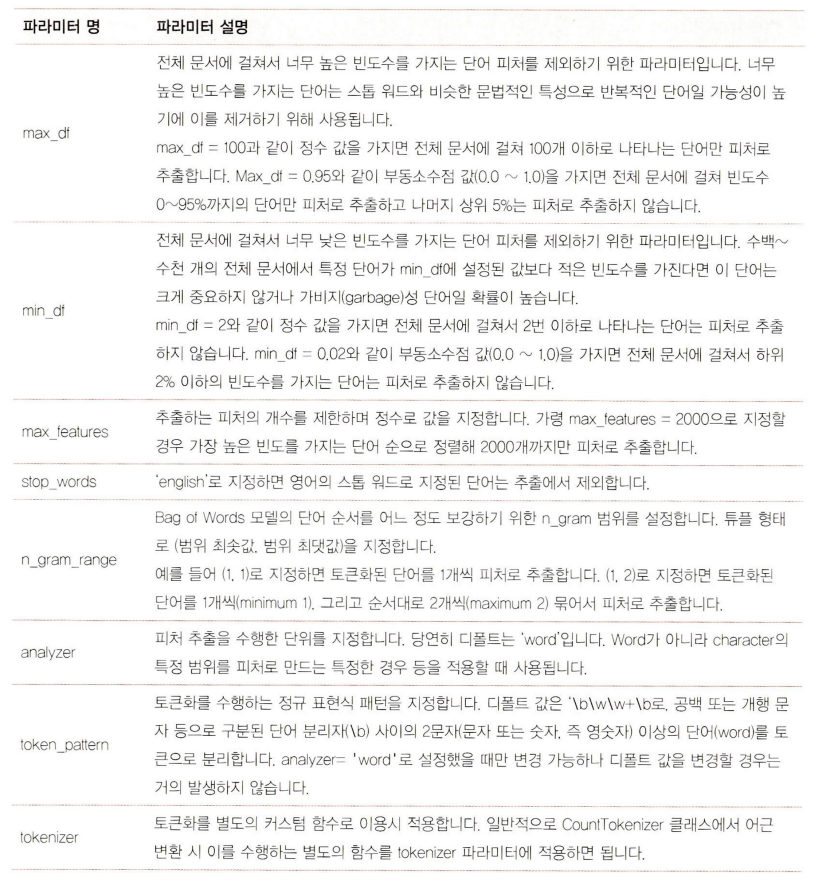


<카운트 기반의 피처 ㅊ여러개의 문서로 구성된 텍스트의 피처 벡터화 방법>


1. 영어의 경우 모든 문자로 소문자로 변경하는 전처리 작업
2. 디폴트로 단어 기준으로 n_gram_range를 반영해 각 단어를 토큰화
3. 텍스트 정규화


### BOW 벡터화를 위한 희소 행렬
- 희소 행렬: 대규모 행렬의 대부분의 값을 0이 차지하는 행렬
- BOW 형태를 가진 언어 모델의 피처 벡터화는 대부분 희소 행렬임
- 희소 행렬은 행렬의 크기가 커서 연산 시에도 데이터 엑세스를 위한 시간이 많이 소모되므로 희소 행렬을 물리적으로 적은 메모리 공간을 차지하도록 변환
  - COO 형식, CSR 형식


### 1) 희소행렬 - COO 형식
- COO(Coordinate:좌표) 형식: 0이 아닌 데이터만 별도의 데이터 배열에 저장하고, 그 데이터가 가리키는 행과 열의 위치를 별도의 배열로 저장하는 방식


In [3]:
# scipy의 sparse를 이용해 희소 행렬 변환을 COO 형식으로 수행
import numpy as np
dense = np.array([[3,0,1],[0,2,0]])

In [4]:
# 위의 밀집 행렬을 COO 형식의 희소 행렬로 변환
from scipy import sparse
# 0이 아닌 데이터 추출
data = np.array([3,1,2])
# 행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용해 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

In [5]:
# 다시 밀집 형태의 행렬로 출력
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

> 다시 원래의 데이터 행렬로 추출됨

### 2) 희소 행렬 - CSR 형식
- CSR(Compressed Sparse Row) 형식: COO 형식이 행과 열의 위치를 나타내기 위해서 반복적인 위치 데이터를 사용해야 하는 문제점을 해결한 방식


In [6]:
from scipy import sparse
dense2 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])
# 0이 아닌 데이터 추출
data2 = np.array([1,5,1,4,3,2,5,6,3,2,7,8,1])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0,0,1,1,1,1,1,2,2,3,4,4,5])
col_pos = np.array([2,5,0,1,3,4,5,1,3,0,3,5,0])

# COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))
# 행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0,2,7,9,10,12,13])
#CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [7]:
dense3 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])


coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)